# <center> Explanatory Analysis on Factors that affect Salary in the US</center>
### <center> by</center>
### <center>Chukwudi Collins Ozoede


## Investigation Overview

In this investigation, I tried to look at the factors that affect wages in the US, Investigation was carried out on:
- age
- sex
- education 
- relationship
- work hour (hour-per-week)

## Dataset Overview
The US Adult income dataset is a repository of 48,842 entries extracted from the 1994 US Census database. It contains 15 columns before cleaning.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
adult_df = pd.read_csv('adult.data.csv')
df = adult_df.copy()

# subseting for the columns needed for this ananlysis
df = df[['age','workclass','education','marital-status', 'occupation', 'relationship', 
         'race', 'sex', 'hours-per-week', 'native-country','salary']]

#replacing ? with np.nan
df = df.replace('?', np.nan)
df.head(5)

#create an age group to avoid noisy and clustered visuals 
ages = df.age
age_group = []
for i, age in ages.items():
    
    if age <= 20:
        age_group.append('17-20')
    elif age>20 and age<31:
        age_group.append('21-30')
    elif age>30 and age<41:
        age_group.append('31-40')
    elif age>40 and age<51:
        age_group.append('41-50')
    elif age>50 and age<61:
        age_group.append('51-60')
    elif age>60 and age<71:
        age_group.append('61-70')
    elif age>70 and age<81:
        age_group.append('71-80')
    else:
        age_group.append('above 80')
df['age_group']= age_group

## Distribution of Salary

> My analysis is based heavily on salary so it is only logical that I have to see the distribution of salary across the population. I can observe from my pie chart below that about 76% of the people earn 50k and below while 24% earn above 50k. 
So let's see how 24% of the population could cross the 50k dollar mark.

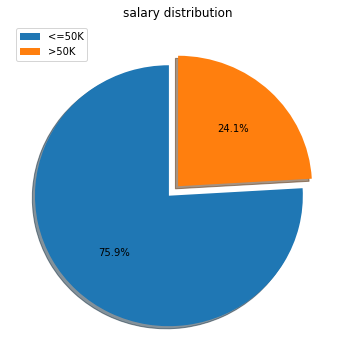

In [3]:
# getting the distribution by salary group
sal_dist= df['salary'].value_counts().reset_index()

#plotting a pie since we only have 2 variables

#creating a function for the pie
def pie_1(data, title, explode,legend, fig_x =6, fig_y=6, shadow = False, startangle =90,autopct ='%1.1f%%'):
    plt.figure(figsize=[fig_x, fig_y])
    
    plt.pie(data, explode = explode, autopct=autopct ,shadow=shadow, startangle=startangle)
    plt.title(title)
    plt.legend(legend)
    
#calling the function    
pie_1(list(sal_dist['salary']),title = 'salary distribution' ,fig_x =6, fig_y=6, 
      explode =[0.1,0], shadow = True, legend = (list(sal_dist['index'])));

## Salary by Age and Age Group

> Looking at both charts below, I can say that people between the ages of 30 and 60 years are more likely to earn above 50k, 40 years being the most likely, people below 30 years are likely earning 50k or less. 
people who are above 60 years are very few on both plots

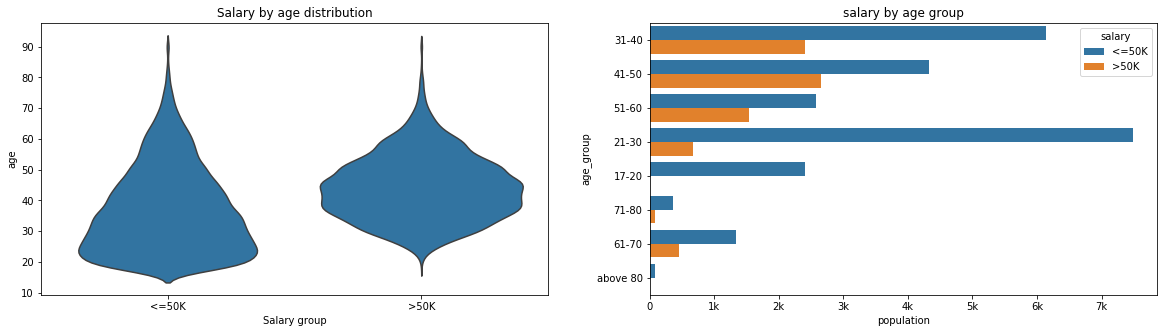

In [4]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
base_color = sb.color_palette()[0]
sb.violinplot(data=df,x='salary', y ='age', color=base_color, inner =None)
plt.title('Salary by age distribution')
plt.xlabel('Salary group')

plt.subplot(1,2,2)
sb.countplot(data = df, y = 'age_group', hue = 'salary')
plt.title('salary by age group')
plt.xlabel('population')
plt.xticks([0,1000,2000,3000,4000,5000,6000,7000],['0','1k','2k','3k','4k','5k','6k','7k']);

## Salary by Education
>most people in the dataset have some college and high school as their highest education, though they mostly earn below 50k. on the other hand people with degree like doctorate, masters, bachelors degrees as well as professors are most likely to earn above 50k, although their population is low.


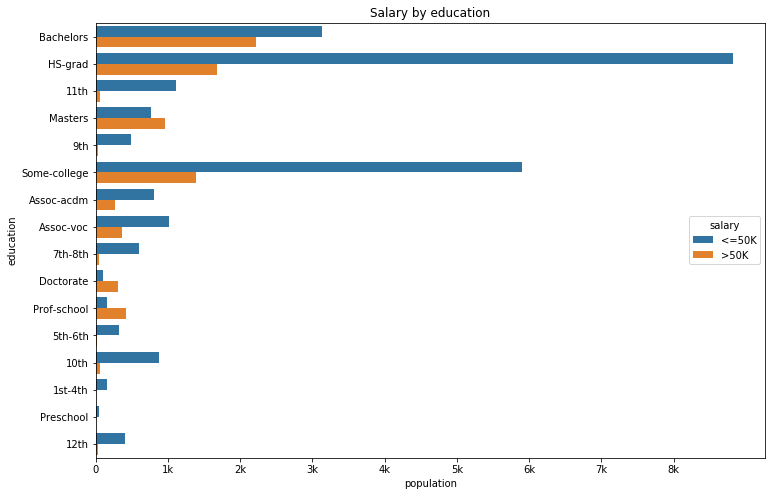

In [5]:
plt.figure(figsize =[12,8])

sb.countplot(data=df, y='education', hue='salary')
plt.title('Salary by education')
plt.xlabel('population')
plt.xticks([0,1000,2000,3000,4000,5000,6000,7000,8000],['0','1k','2k','3k','4k','5k','6k','7k','8k']);

## Corelation between Salary and Relationship

>generally married people earn higher than unmarried people. `Husband` has the highest population in the chart and also with a good number of people earning above 50k,`wife` has the highest ratio of people earning above 50k too though the population of `wife` is low. `Not-in-family` has a huge population but most of them earn below 50k

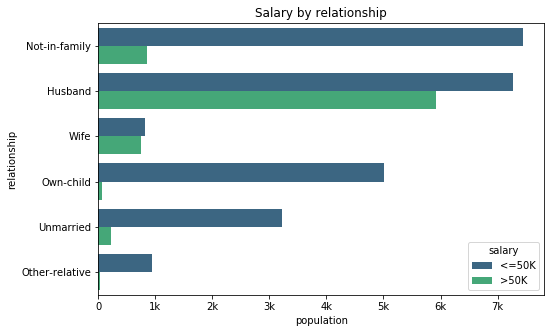

In [6]:
plt.figure(figsize=(8,5))
sb.countplot(data=df, y='relationship', hue='salary',palette='viridis')
plt.xlabel('population')
plt.title('Salary by relationship')
plt.xticks([0,1000,2000,3000,4000,5000,6000,7000],['0','1k','2k','3k','4k','5k','6k','7k']);

## Salary by Age and Sex relationship

Irrespective of the gender, more people earn 50k and below. The least prepresented set in the chart are women who earn above 50k. Young adults below the age of 30 and people above 60 are less likely to ean above 50k, infact only one person per gender below the age of 20 earns above 50k.people who earn above 50k are mostly men between 30 and 60 years.

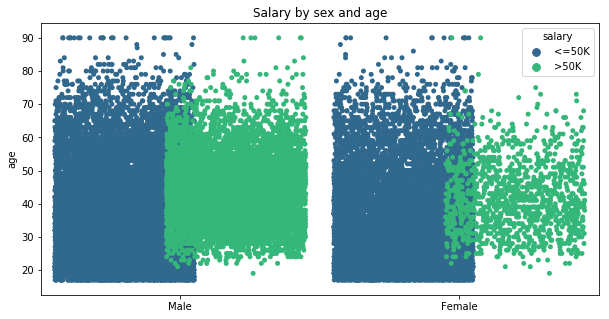

In [7]:
plt.figure(figsize=(10,5))

sb.stripplot(x='sex', y='age', data=df, jitter=0.5, hue='salary', dodge=True, palette='viridis')
plt.xlabel('')
plt.title('Salary by sex and age');


##  Salary by Education and workhour/week


I cannot see any pattern or correlation between education level and how long people worked, the only take away is that people that earn above 50k generally work for longer hours than their counterparts with the same education level. I also found out that nobody with a `preschool` qualification earns more than 50k.

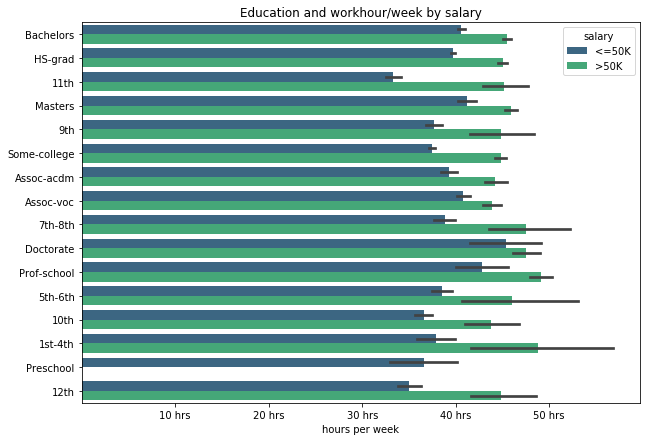

In [8]:
plt.figure(figsize=[10,7])
sb.barplot(data = df, y = 'education', x = 'hours-per-week', hue = 'salary',palette= 'viridis' )
plt.ylabel('')
plt.xlabel('hours per week')
plt.title('Education and workhour/week by salary')
plt.xticks([10,20,30,40,50],['10 hrs','20 hrs','30 hrs','40 hrs','50 hrs']);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
#!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --template output_toggle.tpl --post serve

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 303160 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
